In [69]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Toggle Code"></form>''')

# Evolution of p_top in the F4 run

In [1]:
import utils
from ppm import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib nbagg

prof = yprofile('/rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4')

cb = utils.colourblind

/usr/local/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Reading attributes from file  YProfile-01-1959.bobaaa
Analyzing headers ...
There are 1960 YProfile files in the /rpod2/PPM/YProfiles/AGBTP_M2.0Z1.e-5/F4 directory.
Ndump values range from 0 to 1959
Time values range from 86.5493 to 162264.0


In [50]:
dumps = range(0, 1960, 1)
nd = len(dumps)
t = np.zeros(nd)
p_top = np.zeros(nd)

r_top = 32.
r = prof.get('Y', fname = 0, resolution = 'l')
idx_top = np.argmin(np.abs(r - r_top))

for i in range(nd):
    t[i] = prof.get('t', fname = dumps[i], resolution = 'l')[-1]
    p_top[i] = prof.get('P', fname = dumps[i], resolution = 'l')[idx_top]

r_top = 32.000 Mm


<IPython.core.display.Javascript object>


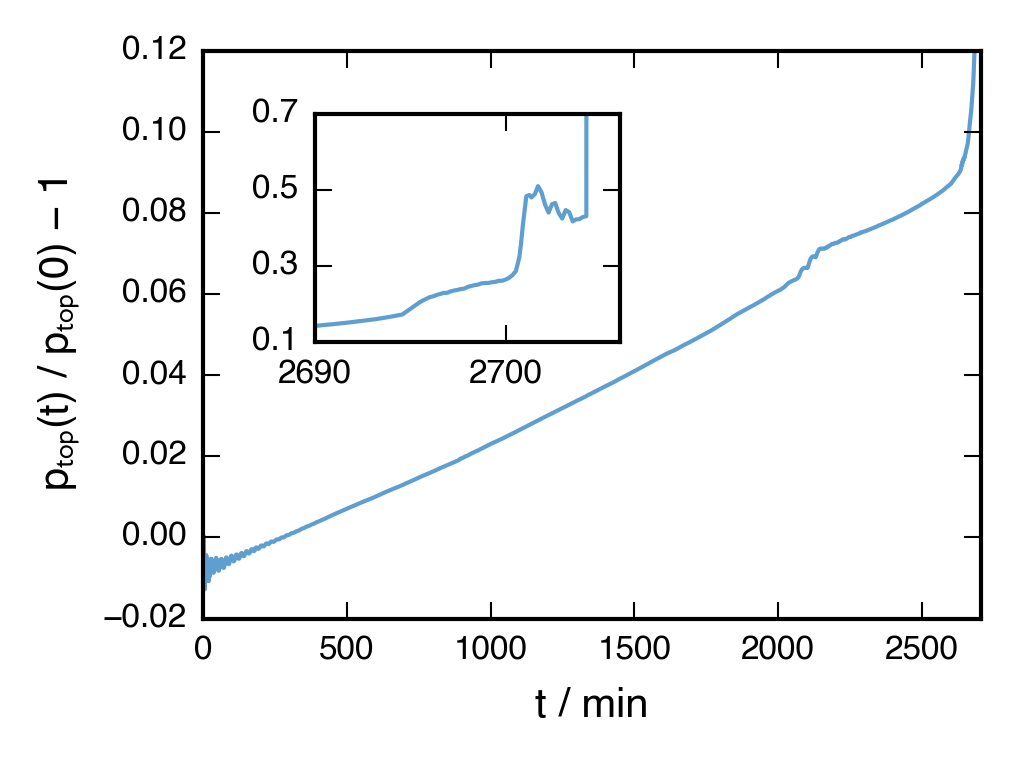

In [84]:
print 'r_top = {:.3f} Mm'.format(r_top)

ifig = 1; plt.close(ifig); fig = plt.figure(ifig)
ax1 = fig.add_subplot(111)
ax1.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
ax1.set_xlim((0., 2706.))
ax1.set_ylim((-0.02, 0.12))
ax1.set_xlabel('t / min')
ax1.set_ylabel(r'p$_\mathrm{top}$(t) / p$_\mathrm{top}$(0) - 1')

left, bottom, width, height = [0.31, 0.55, 0.3, 0.3]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(t/60., p_top/p_top[0] - 1., color=cb(3))
ax2.set_xlim((2690., 2706.))
ax2.set_ylim((0.1, 0.6))
ax2.set_xticks(np.arange(2690., 2710., 10.))
ax2.set_yticks(np.arange(0.1, 0.8, 0.2))

fig.tight_layout()
fig.savefig('p_top_evolution_F4.pdf')